# 1. Load Data

## 1.1 Import Libraries

In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from   sklearn.linear_model import LogisticRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid


from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


# Stats
from scipy.stats import chi2_contingency
from scipy import stats
import time

# Set the options
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
%matplotlib inline

# Tools
import dataframe_image as dfi

r_state = 288874

## 1.2 Load dataset

In [2]:
raw_df = pd.read_csv('bank-additional-full.csv',delimiter=';') 
raw_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 2. Overview of the Data

## 2.1 Descriptive Statistics

In [3]:
raw_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 3. Exploratory Data Analysis

## 3.1 Missing Values and Data Types 

In [5]:
raw_df.isna().sum().sum() # if it returns more than 0 it means there is null value,
# and we can further analyse the columns. Else if it returns 0 it means there is no single null value

0

In [6]:
# However, on the first glance it's seen that there are values with 'unknown' inside some categorical columns

In [7]:
non_num_columns = []

binary_columns = []
yes_no_list = ['yes', 'no', 'unknown']

categorical_columns = []
numerical_columns = []

# df = raw_df.copy()

print("Number of 'unknown's")
for col in raw_df.columns:
    
    if raw_df[col].dtype == object:
        non_num_columns.append(col)
        if raw_df[col][1] in  yes_no_list:
            binary_columns.append(col)
#             df[col] = df[col].map(yes_no_dict)
        else:
            categorical_columns.append(col)
    else: 
        numerical_columns.append(col)
    count = 0
    for el in raw_df[col]:
        if el == 'unknown':
            count+=1
    print(col,count)

Number of 'unknown's
age 0
job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


In [8]:
print("Column data types:\n")
print("Binary columns: ", binary_columns)
print("Categorical columns: ", categorical_columns)
print("Numerical columns: ", numerical_columns)

Column data types:

Binary columns:  ['default', 'housing', 'loan', 'y']
Categorical columns:  ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical columns:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


## 3.2 Data distribution

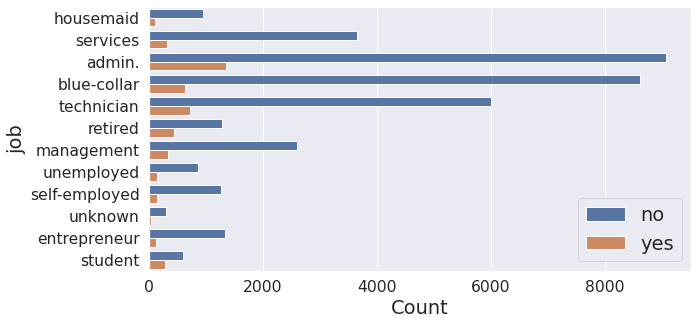

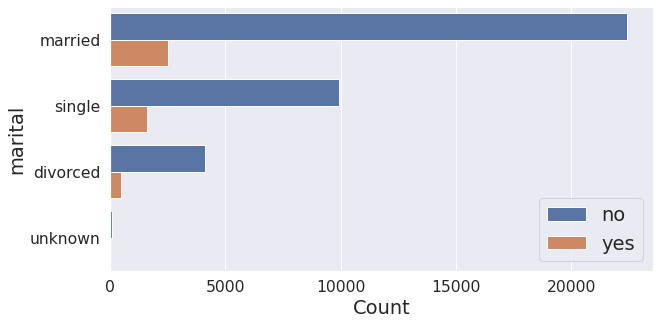

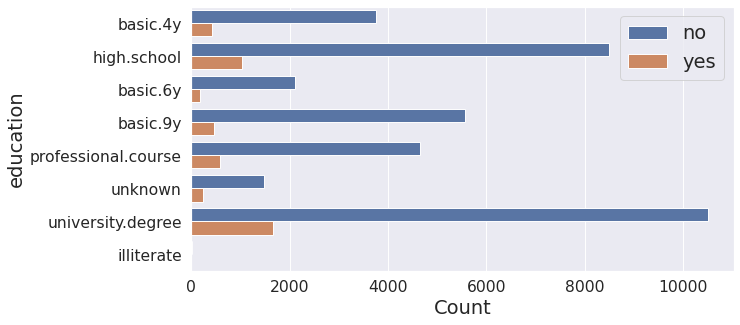

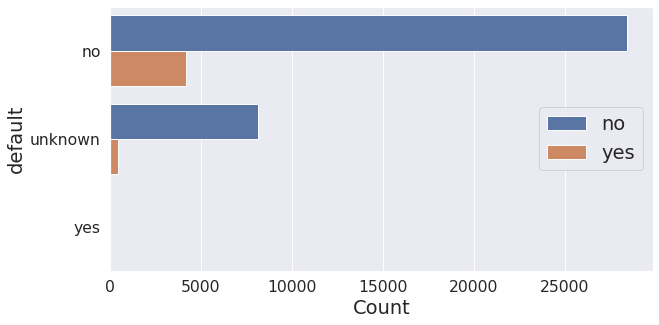

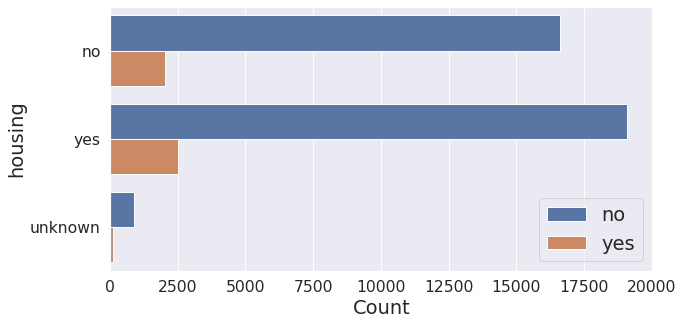

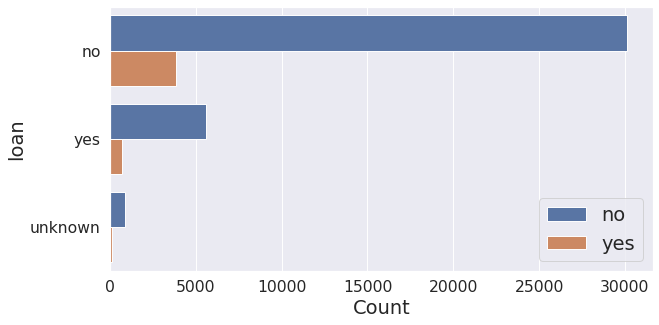

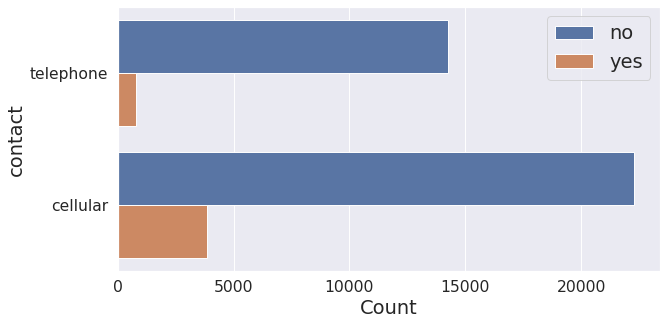

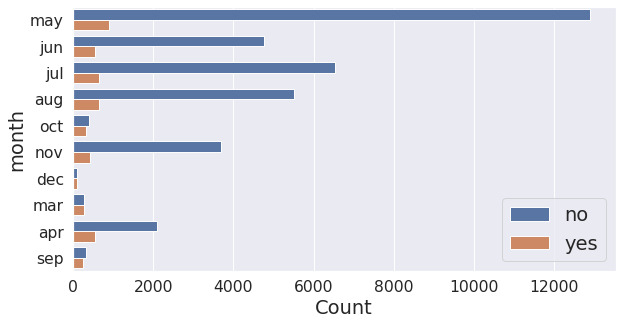

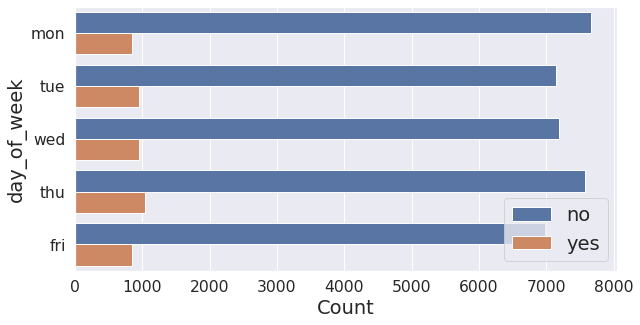

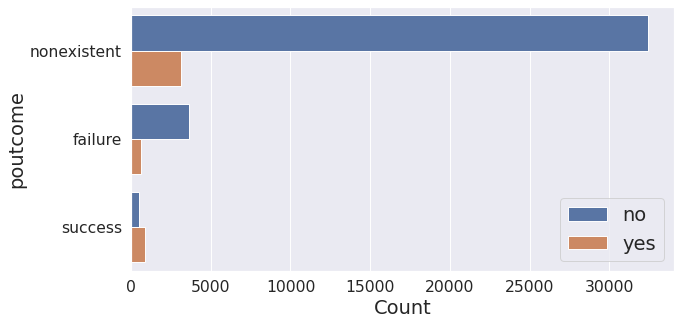

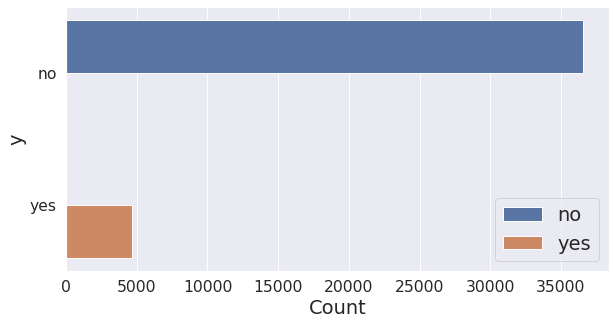

In [9]:
sns.set_palette(sns.color_palette("deep"))
FONTSIZE = 20
for col in raw_df.columns:
    if raw_df[col].dtype == object:
        fig = plt.figure(figsize=(10,5), dpi= 70)
        ax = sns.countplot(y=raw_df[col] ,data=raw_df, hue=raw_df.y)
        plt.xlabel("Count", fontsize=FONTSIZE)
        plt.ylabel(col, fontsize=FONTSIZE)
        
        ax.legend(fontsize=FONTSIZE)
        
        ax.tick_params(axis='x', labelsize=16) 
        ax.tick_params(axis='y', labelsize=16) 
    
        fig.savefig('cat1'+col+'.svg', format='svg', transparent=False)
        plt.show()

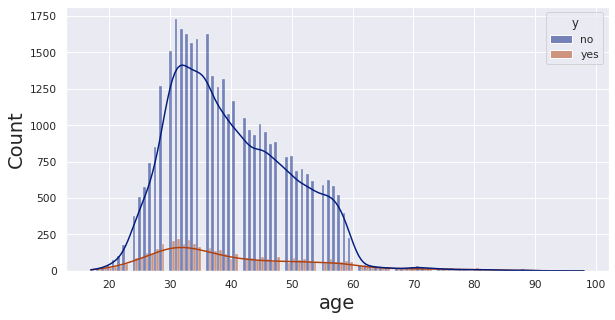

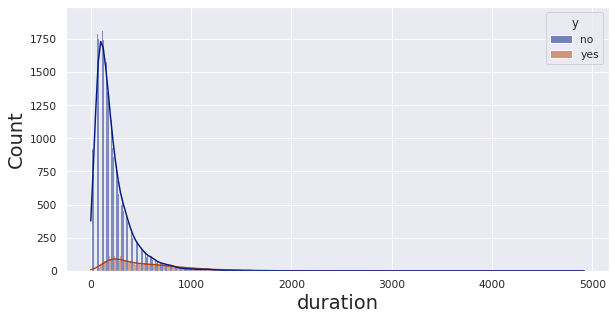

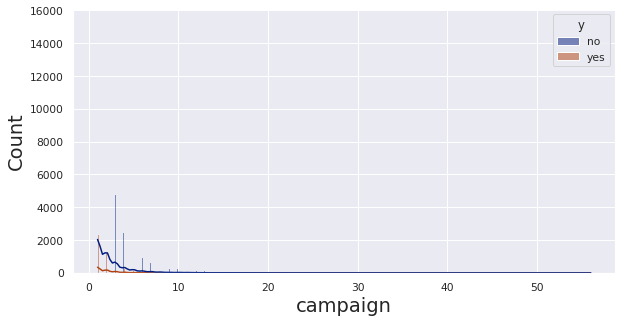

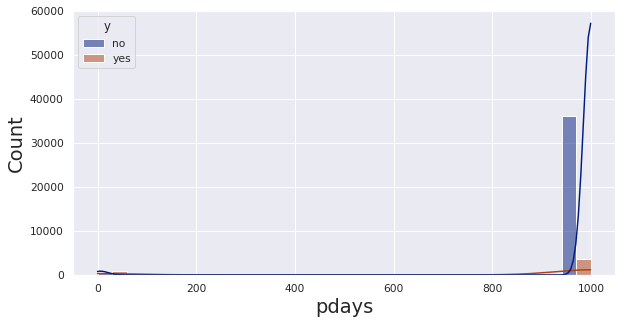

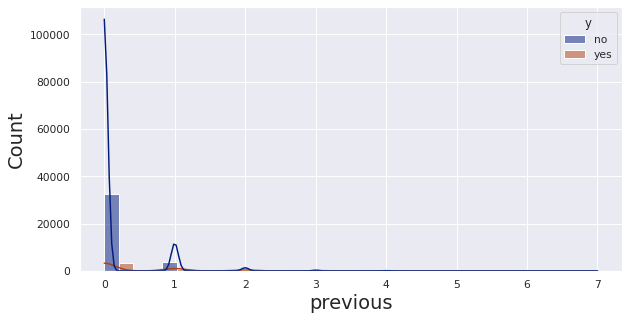

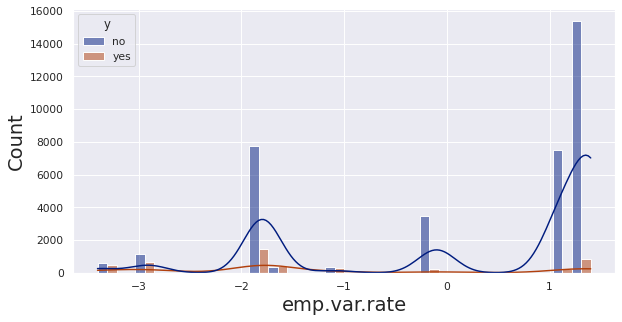

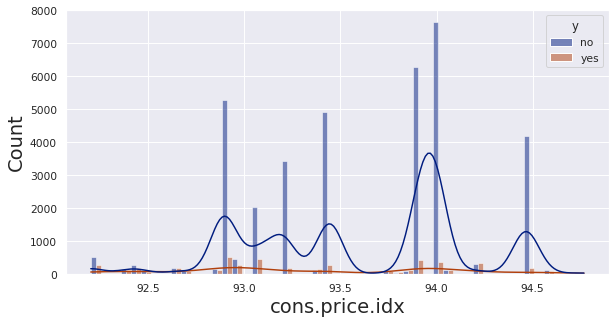

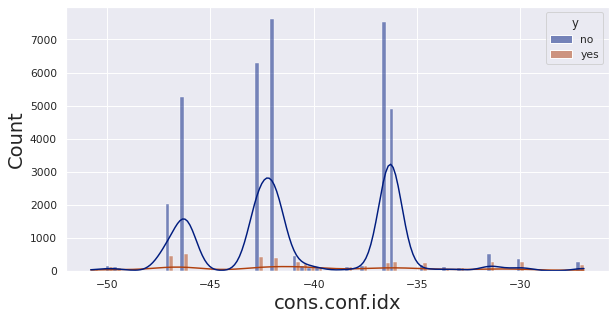

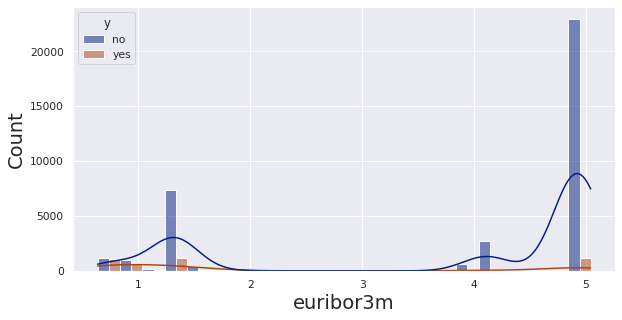

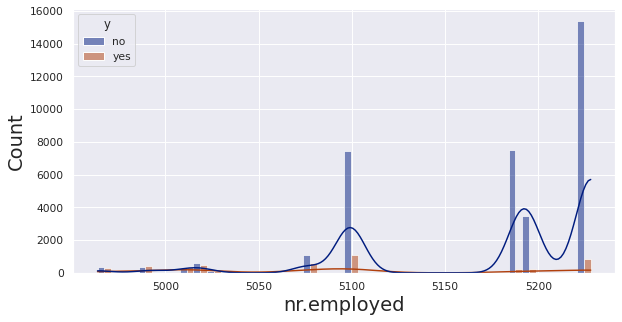

In [10]:
sns.set_palette(sns.color_palette("dark"))
for col in raw_df.describe().columns:
    fig = plt.figure(figsize=(10,5), dpi= 70)
    sns.histplot(data=raw_df, x=raw_df[col], hue=raw_df.y, multiple="dodge", kde=True)
    plt.ylabel("Count", fontsize=FONTSIZE)
    plt.xlabel(col, fontsize=FONTSIZE)

    ax.legend(fontsize=FONTSIZE)

    ax.tick_params(axis='x', labelsize=16) 
    ax.tick_params(axis='y', labelsize=16) 

    fig.savefig('hist1'+col+'.svg', format='svg', transparent=False)
    plt.show()
#     print(col, raw_df[col].unique())

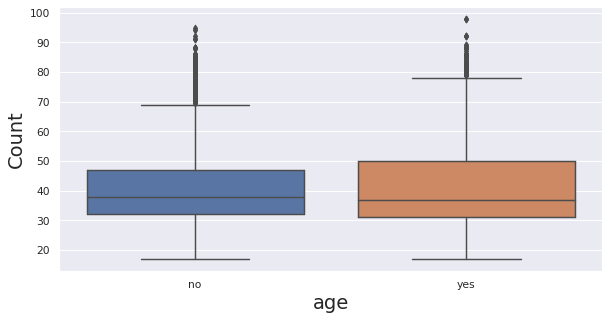

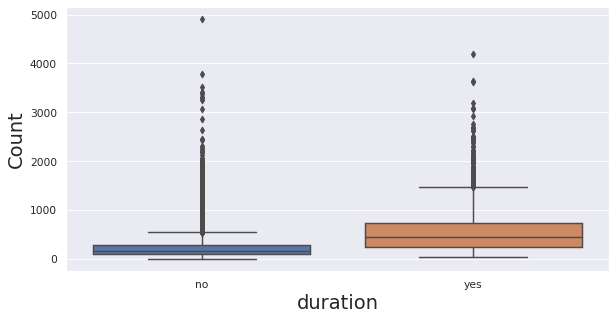

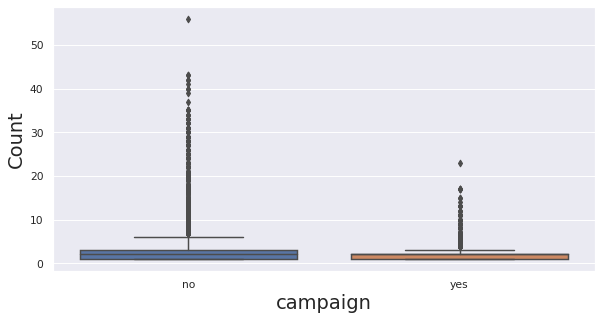

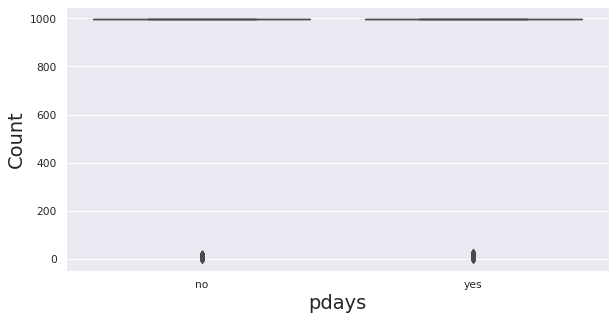

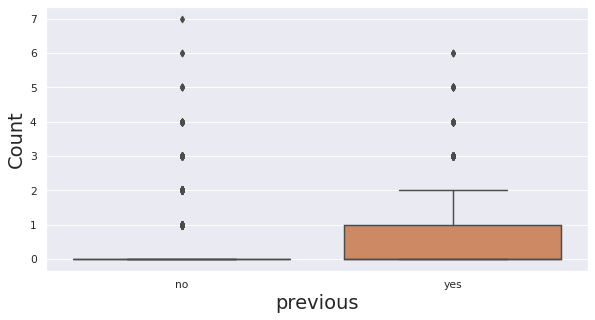

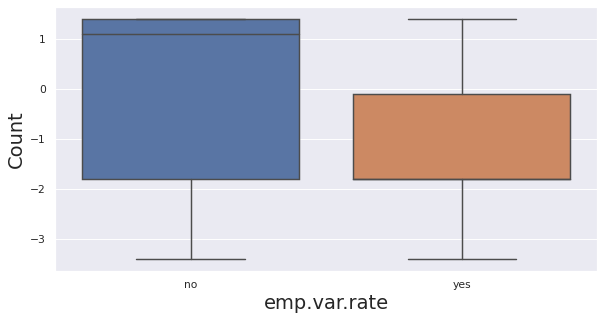

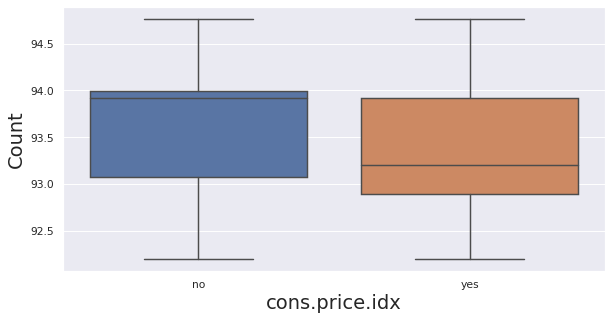

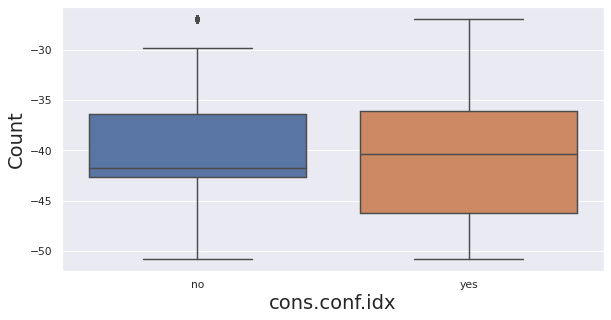

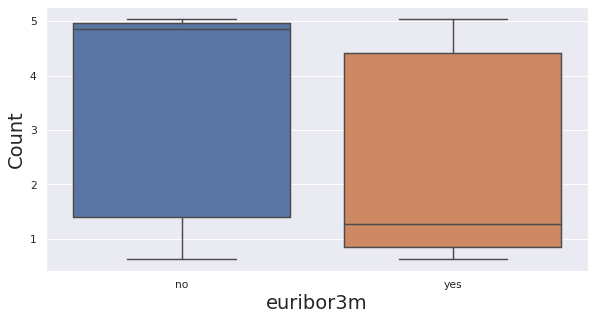

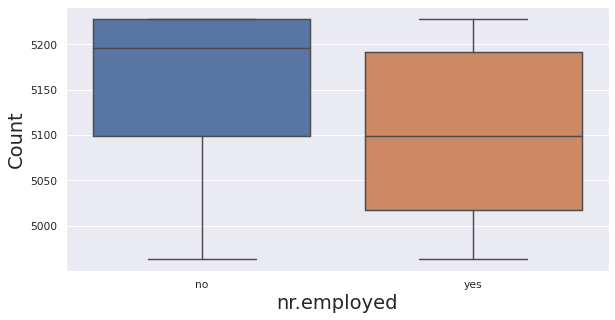

In [11]:
sns.set_palette(sns.color_palette("deep"))

for col in raw_df.describe().columns:
    fig = plt.figure(figsize=(10,5), dpi= 70)
    sns.boxplot(data=raw_df, y=raw_df[col], x=raw_df.y)
    plt.ylabel("Count", fontsize=FONTSIZE)
    plt.xlabel(col, fontsize=FONTSIZE)

    ax.legend(fontsize=FONTSIZE)

    ax.tick_params(axis='x', labelsize=16) 
    ax.tick_params(axis='y', labelsize=16) 

    fig.savefig('box1'+col+'.svg', format='svg', transparent=False)
    plt.show()

In [12]:
def find_gini(mList):
    m = len(mList)
    den = mList.sum()
    s = 0
    for i in mList:
        s+= np.square(i/den)
    G_n = m/(m-1) * (1-s)
    return G_n

In [13]:
# for col in raw_df.columns:
#     print(col, find_gini(raw_df[col].value_counts()), col in non_num_columns)
gini_indices = [find_gini(raw_df[col].value_counts()) for col in raw_df.columns]
isCat_list = [col in non_num_columns for col in raw_df.columns]

gini_df_dict = {'feature': raw_df.columns, 'Gn': gini_indices, 'isCategorical':  isCat_list}
gini_df = pd.DataFrame(gini_df_dict).sort_values(by=["Gn"], ascending=False)
gini_df = gini_df.reset_index(drop=True)

In [14]:
pd.set_option('display.max_rows', None)
gini_df

,feature,Gn,isCategorical
0,day_of_week,0.999686,True
1,duration,0.998491,False
2,age,0.983037,False
3,euribor3m,0.976714,False
4,contact,0.927372,True
5,education,0.921679,True
6,job,0.914616,True
7,cons.conf.idx,0.913897,False
8,cons.price.idx,0.913897,False
9,month,0.893390,True


In [15]:
pd.set_option('display.max_rows', 10)

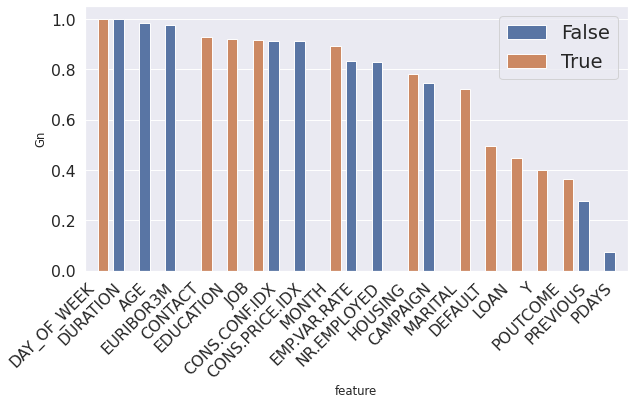

In [16]:
    fig = plt.figure(figsize=(10,5), dpi= 70)

    ax = sns.barplot(data=gini_df, x='feature', y='Gn', hue='isCategorical')
    plt.xticks(gini_df.index, gini_df['feature'].str.upper(), rotation=45, horizontalalignment='right', fontsize=FONTSIZE)
    ax.legend(fontsize=FONTSIZE)
    ax.tick_params(axis='y', labelsize=16) 
    ax.tick_params(axis='x', labelsize=16) 

    plt.show()

    fig.savefig('gini1.svg', format='svg', transparent=False)

## 3.3 Data correlation

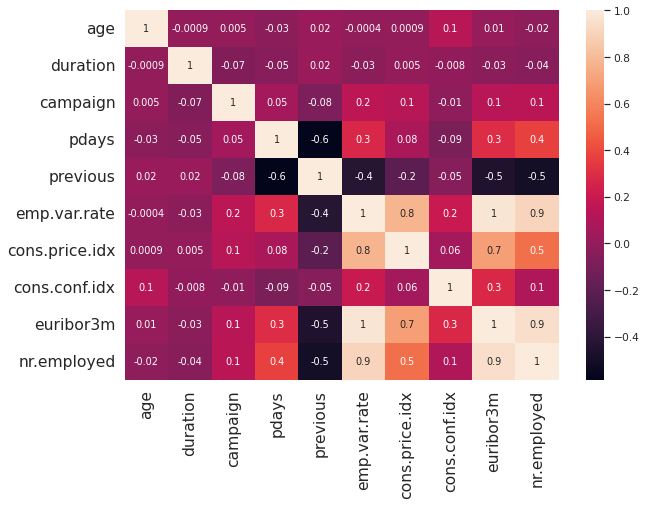

In [17]:
fig = plt.figure(figsize=(10,7), dpi= 70)
ax = sns.heatmap(raw_df.corr(), annot = True, fmt='.1g')
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.show()

fig.savefig('heatmap.svg', format='svg', transparent=False)

In [18]:
y_array = raw_df['y'].map({'yes':1, 'no':0})
for col in numerical_columns:    
    print(col, stats.pointbiserialr(y_array, raw_df[col])[1])

age 6.802136418820632e-10
duration 0.0
campaign 2.0077799907200388e-41
pdays 0.0
previous 0.0
emp.var.rate 0.0
cons.price.idx 9.318964779942429e-170
cons.conf.idx 7.536664996977963e-29
euribor3m 0.0
nr.employed 0.0


In [19]:
pd.crosstab(index=raw_df['y'], columns=raw_df['loan'])

loan,no,unknown,yes
y,,,
no,30100,883,5565
yes,3850,107,683


In [20]:
chi2_contingency(pd.crosstab(index=raw_df['y'], columns=raw_df['loan']))

(1.094027551150338,
 0.5786752870441754,
 2,
 array([[30125.39089055,   878.47237059,  5544.13673886],
        [ 3824.60910945,   111.52762941,   703.86326114]]))

In [21]:

# H0: The variables are not correlated with each other. This is the H0 used in the Chi-square test.

# In the above example, the P-value came higher than 0.05. Hence H0 will be accepted. 
# Which means the variables are not correlated with each other.

# This means, if two variables are correlated, then the P-value will come very close to zero.


for col in non_num_columns:
    cross_tab = pd.crosstab(index=raw_df['y'], columns=raw_df[col])
    print(col, chi2_contingency(cross_tab)[1])

job 4.189763287563861e-199
marital 2.068014648442211e-26
education 3.3051890144025054e-38
default 5.1619579513916376e-89
housing 0.05829447669453452
loan 0.5786752870441754
contact 1.5259856523129964e-189
month 0.0
day_of_week 2.9584820052785324e-05
poutcome 0.0
y 0.0


# 4 Data Preprocessing

- Clean the data
- Encode the categorical features
- Split the dataset in X and y dataset
- Scale the features
- Split the data in train and test set

## 4.1 Data Cleaning

Looking at the gini indices of features we can see that only 6 of them has concerningly lower heterogenity:
{default, loan, y, poutcome, previous, pdays}.

Having known this fact we can further examine these features for cleaning:
 - default: there is only 3 rows with 'yes', it has too many rows for 'unknown', and even the heterogenity inside the 'no' shows that using this feature for our model is not 'recommended'
 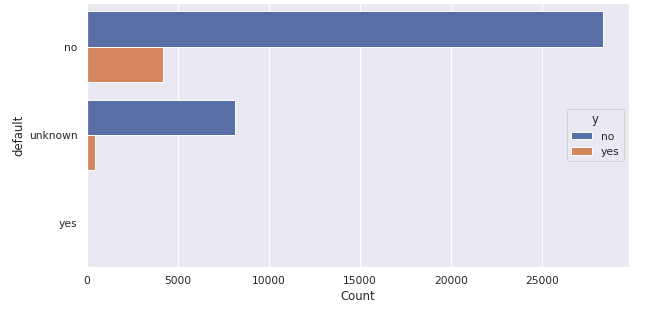
 

 - loan: we can see from p-value calculated (~0.5) that the correlation between loan and target variable is not statistically significant, so we can neglect this feature too
 - y: it shows that our data is a bit imbalanced, we can use one of the known methods later on to balance our data
 - poutcome: even though this feature has very low gini index and imbalance towards 'success' is significant, we can see that it also has enough number of 'success' to later balance the dataset. For now we can keep this feature.
 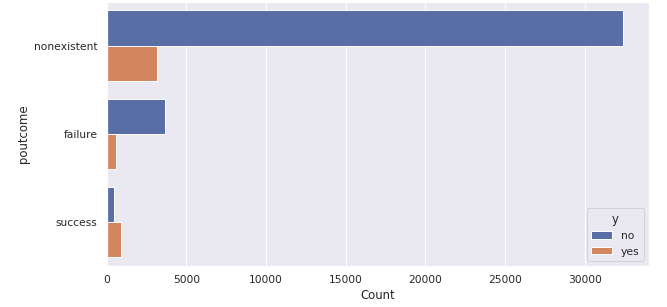
 - previous: we also keep this feature. It's skewed towards the end and it only has 8 distinct values 
 - pdays: in this feature 96% data is in one value, 999. We can remove this feature

In [22]:
raw_df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [23]:
raw_df['pdays'].value_counts()[999]/len(raw_df)

0.9632174419733903

Moreover, as suggested in the documentation of the dataset, we remove the duration for the sake of realistic predictive model. Because duration of each call is not known before the call is actually performed. 

Having known all things mentioned above we can define the features we want to remove:

In [24]:
# removed_columns = ['default', 'loan', 'pdays', 'duration', 'housing', 'poutcome']
removed_columns = ['default', 'loan', 'pdays', 'housing', 'duration']

In [25]:
half_clean_df = raw_df.drop(columns=removed_columns, axis=1)
half_clean_df

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


We also need to review the 'unknown's after partially cleaned the data.

In [34]:
non_num_columns = []

binary_columns = []

categorical_columns = []

numerical_columns = []

print("Number of 'unknown's after partially cleaning")
for col in half_clean_df.columns:
    
    if half_clean_df[col].dtype == object:
        non_num_columns.append(col)
        if half_clean_df[col][0] in  yes_no_list:
            binary_columns.append(col)
#             df[col] = df[col].map(yes_no_dict)
        else:
            categorical_columns.append(col)
    else: 
        numerical_columns.append(col)
    count = 0
    for el in half_clean_df[col]:
        if el == 'unknown':
            count+=1
    print(col,count)

Number of 'unknown's after partially cleaning
age 0
job 330
marital 80
education 1731
contact 0
month 0
day_of_week 0
campaign 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


In [36]:
print("Column data types:\n")
print("Binary columns: ", binary_columns)
print("Categorical columns: ", categorical_columns)
print("Numerical columns: ", numerical_columns)

Column data types:

Binary columns:  ['y']
Categorical columns:  ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical columns:  ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [37]:
clean_df = half_clean_df.copy()
for col in non_num_columns:
#     print(col, len(clean_df))
    clean_df = clean_df.drop(clean_df[clean_df[col] == 'unknown'].index)
clean_df = clean_df.reset_index(drop=True)
clean_df

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39186,73,retired,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
39187,46,blue-collar,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
39188,56,retired,married,university.degree,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
39189,44,technician,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [38]:
def outlier_remover(df):
    df_t = df
    q_low = df_t["age"].quantile(0.01)
    q_hi  = df_t["age"].quantile(0.99)

    df_t = df_t.drop(df_t[((df_t["age"] > q_hi) | (df_t["age"] < q_low))].index)
    
    
    q_low = df_t["previous"].quantile(0.01)
    q_hi  = df_t["previous"].quantile(0.99)
    
    df_t = df_t.drop(df_t[((df_t["previous"] > q_hi) | (df_t["previous"] < q_low))].index)

    
    q_low = df_t["campaign"].quantile(0.01)
    q_hi  = df_t["campaign"].quantile(0.95)

    df_t = df_t.drop(df_t[((df_t["campaign"] > q_hi) | (df_t["campaign"] < q_low))].index)

    
    return df_t

clean_df = outlier_remover(clean_df)
clean_df = clean_df.reset_index(drop=True)
clean_df

,age,job,marital,education,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36575,37,admin.,married,university.degree,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
36576,29,unemployed,single,basic.4y,cellular,nov,fri,1,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
36577,46,blue-collar,married,professional.course,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
36578,56,retired,married,university.degree,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


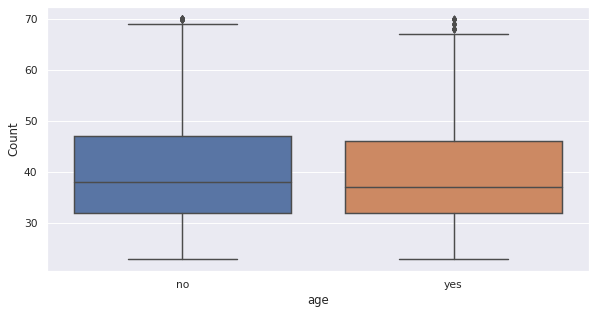

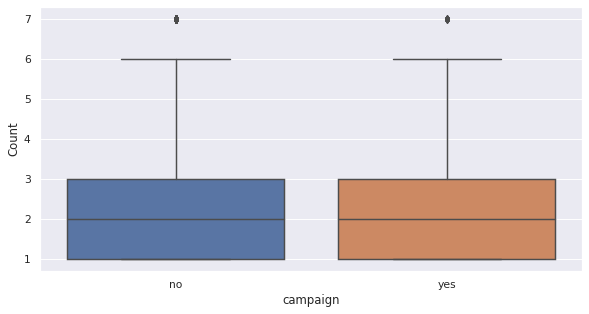

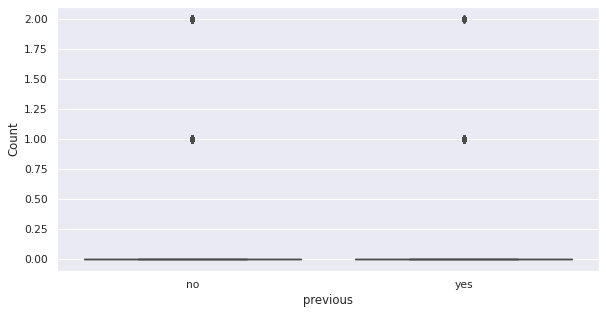

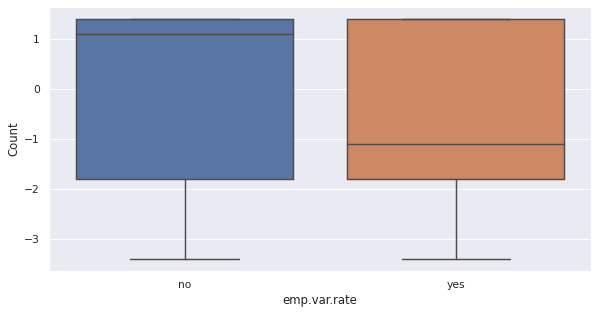

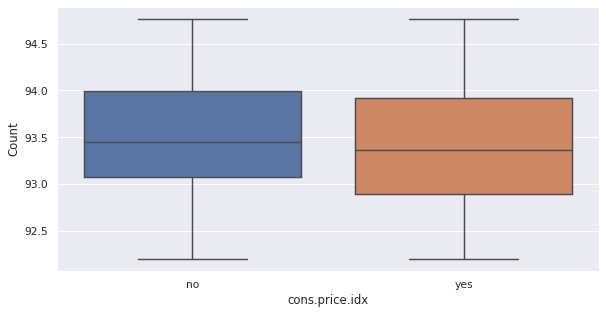

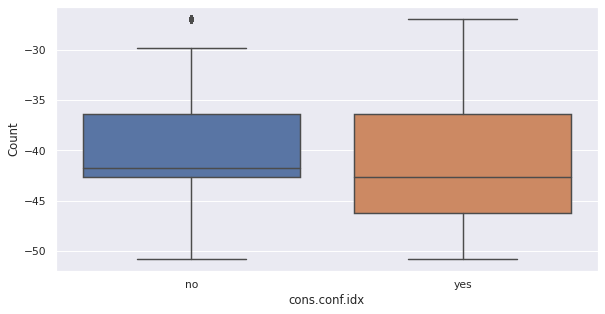

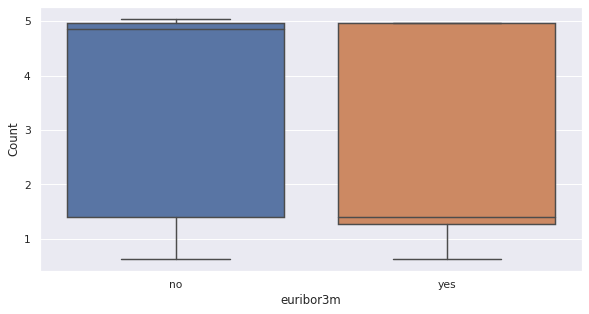

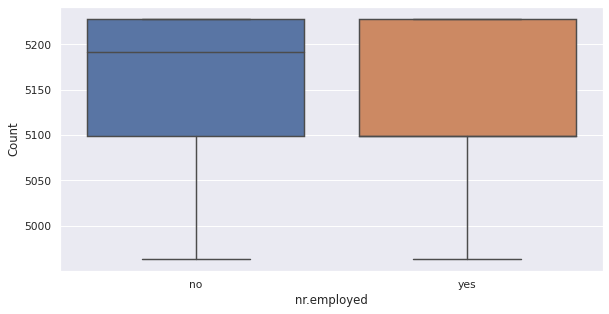

In [39]:
sns.set_palette(sns.color_palette("deep"))

for col in clean_df.describe().columns:
    plt.figure(figsize=(10,5), dpi= 70)
    sns.boxplot(data=clean_df, y=col, x=raw_df.y)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## 4.2 Feature encoding

In [40]:
encoded_df = pd.get_dummies(clean_df, columns = categorical_columns)
yes_no_dict = {'yes':1, 'no':0, 'unknown': -1}
for col in binary_columns:
    encoded_df[col] = encoded_df[col].map(yes_no_dict)
encoded_df

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36575,37,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
36576,29,1,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
36577,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
36578,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


## 4.3 X-y split

In [42]:
y = encoded_df['y']
X = encoded_df.drop(columns=['y'], axis=1)

## 4.4 Feature scaling

In [43]:
def scale_data(data, scale_cols, non_scale_cols):
    
    scaler = StandardScaler()

    # transform data
    scaled_data = scaler.fit_transform(data[scale_cols])
    scaled_data = DataFrame(scaled_data, columns=scale_cols)
    scaled_df = pd.concat([scaled_data, data[non_scale_cols]], axis=1)

#     scaled_data.columns = data.columns
    
    return scaled_df

In [44]:
non_numerical_columns = [col for col in list(X.columns) if not col in numerical_columns]

X_scaled = scale_data(X, numerical_columns, non_numerical_columns)
X_scaled

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.722447,-0.797842,-0.369011,0.648246,0.752308,0.914416,0.707985,0.318228,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1.827696,-0.797842,-0.369011,0.648246,0.752308,0.914416,0.707985,0.318228,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,-0.277284,-0.797842,-0.369011,0.648246,0.752308,0.914416,0.707985,0.318228,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.038463,-0.797842,-0.369011,0.648246,0.752308,0.914416,0.707985,0.318228,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,1.722447,-0.797842,-0.369011,0.648246,0.752308,0.914416,0.707985,0.318228,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36575,-0.277284,-0.797842,-0.369011,-0.768592,2.105951,-2.229079,-1.527422,-2.951141,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
36576,-1.119277,-0.797842,2.133016,-0.768592,2.105951,-2.229079,-1.527422,-2.951141,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
36577,0.669957,-0.797842,-0.369011,-0.768592,2.105951,-2.229079,-1.527422,-2.951141,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
36578,1.722447,-0.092122,-0.369011,-0.768592,2.105951,-2.229079,-1.527422,-2.951141,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


## 4.5 Train Test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 42)

## 4.6 Balance dataset

In [46]:
print('Before SMOTE:\n')
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

over_sampler = SMOTE(k_neighbors=4)
X_res, y_res= over_sampler.fit_resample(X_train, y_train)
print('After SMOTE:\n')
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Before SMOTE:

Training target statistics: Counter({0: 29415, 1: 3507})
Testing target statistics: Counter({0: 3282, 1: 376})
After SMOTE:

Training target statistics: Counter({0: 29415, 1: 29415})
Testing target statistics: Counter({0: 3282, 1: 376})


In [47]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = over_sampler.fit_resample(X_train, y_train)

print(f"Training target statistics: {Counter(y_over)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 29415, 1: 29415})
Testing target statistics: Counter({0: 3282, 1: 376})


In [48]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy=0.9)

X_under, y_under = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_under)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 3896, 1: 3507})
Testing target statistics: Counter({0: 3282, 1: 376})


In [49]:
under_sampler = RandomUnderSampler(sampling_strategy=0.2)
over_sampler = SMOTE(k_neighbors=2)

X_r_under, y_r_under = under_sampler.fit_resample(X_train, y_train)
X_res_under, y_res_under = over_sampler.fit_resample(X_r_under, y_r_under)
print(f"Training target statistics: {Counter(y_res_under)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 17535, 1: 17535})
Testing target statistics: Counter({0: 3282, 1: 376})


In [50]:
from imblearn.pipeline import Pipeline
model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', DecisionTreeClassifier())
    ])
# {'criterion': 'entropy', 'max_depth': 100, 'splitter': 'random'}
params = [{'sampling__k_neighbors':[4]}, {'classification__criterion':['gini', 'entropy'],
                     'classification__splitter':['best', 'random'],
                     'classification__max_depth':[10,100,None]}]
grid = GridSearchCV(model, params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('classification',
                                        DecisionTreeClassifier())]),
             param_grid=[{'sampling__k_neighbors': [4]},
                         {'classification__criterion': ['gini', 'entropy'],
                          'classification__max_depth': [10, 100, None],
                          'classification__splitter': ['best', 'random']}])

In [51]:
grid.best_score_

0.8633127408567836

/home/matteo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


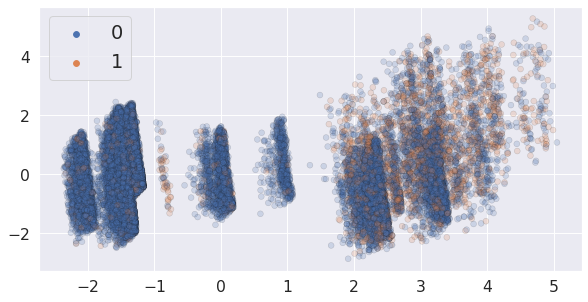

/home/matteo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


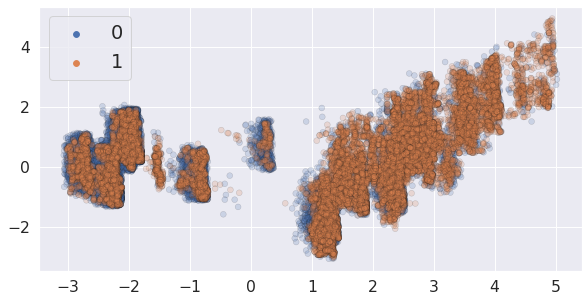

/home/matteo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


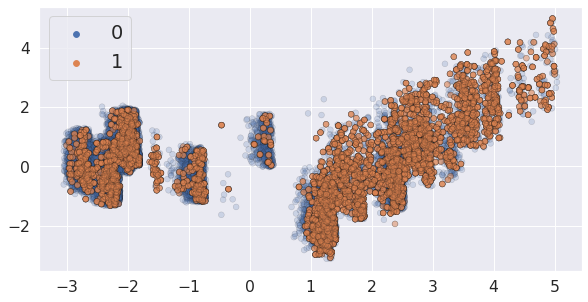

/home/matteo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


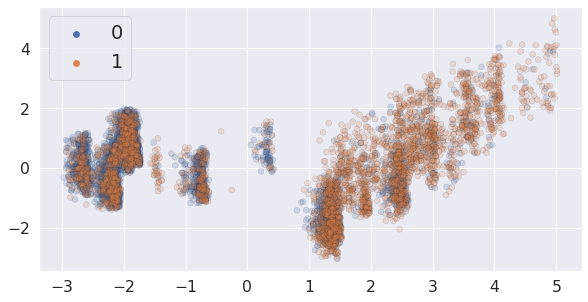

/home/matteo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


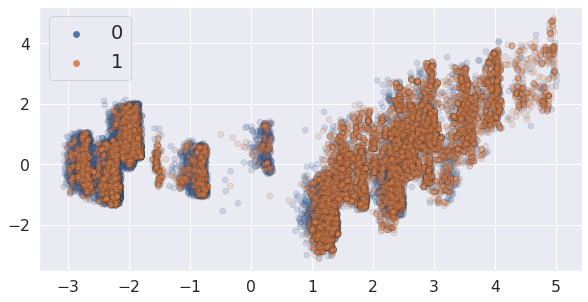

In [52]:
pca = PCA()
pcas = []

X_pca = pca.fit_transform(X_train)
pcas.append(X_pca)
fig = plt.figure(figsize=(10,5), dpi= 70)
ax = sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.2)
ax.legend(fontsize=FONTSIZE)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16)
plt.show()
fig.savefig('pca_train.png', format='png', transparent=False)

X_pca = pca.fit_transform(X_res)
pcas.append(X_pca)
fig = plt.figure(figsize=(10,5), dpi= 70)
ax = sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.2)
ax.legend(fontsize=FONTSIZE)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16)
plt.show()
fig.savefig('pca_smote.svg', format='svg', transparent=False)

X_pca = pca.fit_transform(X_over)
pcas.append(X_pca)
fig = plt.figure(figsize=(10,5), dpi= 70)
ax = sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y_over, cmap=plt.cm.prism, edgecolor='k', alpha=0.2)
ax.legend(fontsize=FONTSIZE)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16)
plt.show()
fig.savefig('pca_over.svg', format='svg', transparent=False)

X_pca = pca.fit_transform(X_under)
pcas.append(X_pca)
fig = plt.figure(figsize=(10,5), dpi= 70)
ax = sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y_under, cmap=plt.cm.prism, edgecolor='k', alpha=0.2)
ax.legend(fontsize=FONTSIZE)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16)
plt.show()
fig.savefig('pca_under.svg', format='svg', transparent=False)

X_pca = pca.fit_transform(X_res_under)
pcas.append(X_pca)
fig = plt.figure(figsize=(10,5), dpi= 70)
ax = sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y_res_under, cmap=plt.cm.prism, edgecolor='k', alpha=0.2)
ax.legend(fontsize=FONTSIZE)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16)
plt.show()
fig.savefig('pca_under_smote.svg', format='svg', transparent=False)

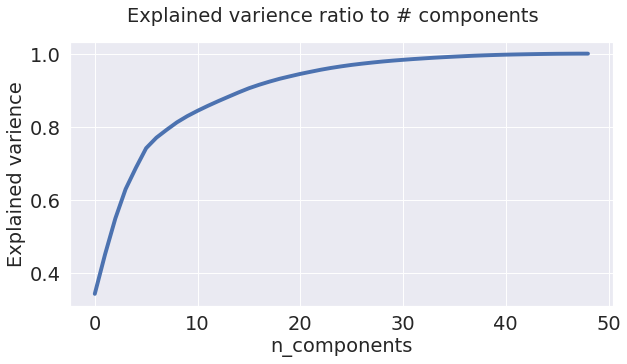

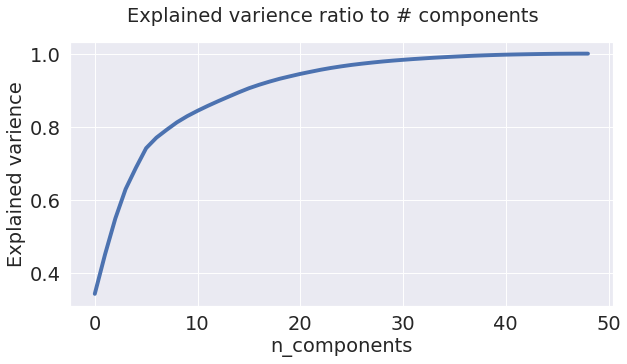

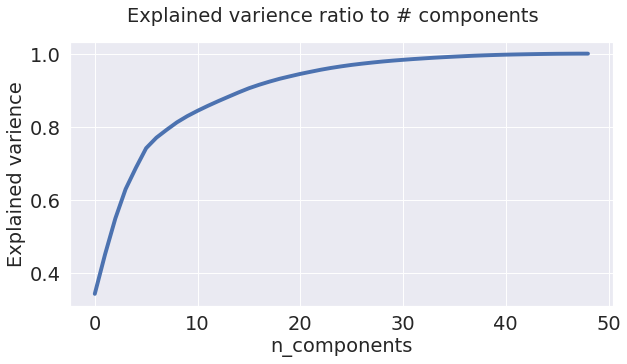

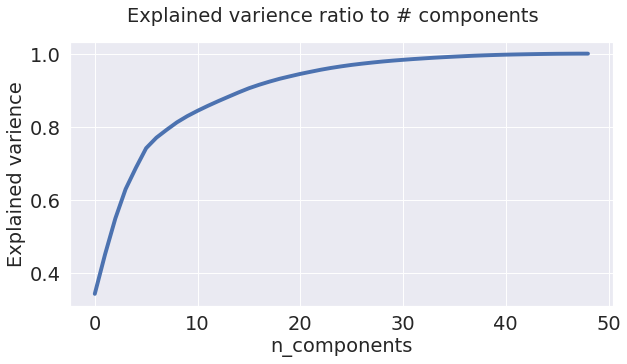

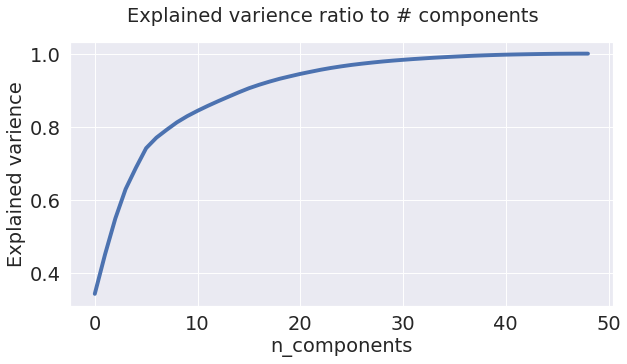

In [53]:
for i, p in enumerate(pcas):

    fig, ax = plt.subplots(figsize=(10,5), dpi=70)
    fig.suptitle('Explained varience ratio to # components', fontsize=FONTSIZE)
    ax.plot(pca.explained_variance_ratio_.cumsum(), linewidth=4)
    ax.set_xlabel('n_components', fontsize=FONTSIZE)
    ax.set_ylabel('Explained varience', fontsize=FONTSIZE)
    ax.tick_params(axis='x', labelsize=FONTSIZE) 
    ax.tick_params(axis='y', labelsize=FONTSIZE) 

    fig.savefig('pca_'+ str(i) +'.svg', format='svg')

# 5 Model building

## 5.1 Choosing best train set

In [54]:
def build_and_test(X_tr, X_te, y_tr, y_te, algo='d_tree', class_weight = None):
    
    if class_weight!= None:
        if algo == 'd_tree':
            model = DecisionTreeClassifier(class_weight=class_weight)
        elif algo == 'log':
            model = LogisticRegression(class_weight=class_weight)
    else:
        if algo == 'd_tree':
            model = DecisionTreeClassifier()
        elif algo == 'log':
            model = LogisticRegression()

    if algo == 'ada':
        model = AdaBoostClassifier()
        
    model.fit(X_tr, y_tr)
    
    # Test the model
    y_pred = model.predict(X_te)
    print('Precision score %s' % precision_score(y_te, y_pred))
    print('Recall score %s' % recall_score(y_te, y_pred))
    print('F1-score score %s' % f1_score(y_te, y_pred))
    print('Accuracy score %s\n' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)

    # Plot metrics 
    ax = plot_roc(y_te, y_score)
    ax.tick_params(axis='x', labelsize=FONTSIZE) 
    ax.tick_params(axis='y', labelsize=FONTSIZE) 

    plt.show()
    
#     plot_precision_recall(y_te, y_score)
#     plt.show()
    
#     # Print a classification report
#     print(classification_report(y_te,y_pred))

    return roc_auc0,fpr0,tpr0

In [55]:
def builds(algo = 'd_tree'):
    print('Algo', algo)
    print("No balance\n")
    build_and_test(X_train, X_test, y_train, y_test, algo=algo)
    print("SMOTE\n")
    build_and_test(X_res, X_test, y_res, y_test, algo=algo)
    print("Random over\n")
    build_and_test(X_over, X_test, y_over, y_test, algo=algo)
    print("Random under\n")
    build_and_test(X_under, X_test, y_under, y_test, algo=algo)
    print("Random under + SMOTE\n")
    build_and_test(X_res_under, X_test, y_res_under, y_test, algo=algo)    

Algo log
No balance



/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision score 0.6842105263157895
Recall score 0.2074468085106383
F1-score score 0.3183673469387755
Accuracy score 0.9086932750136687



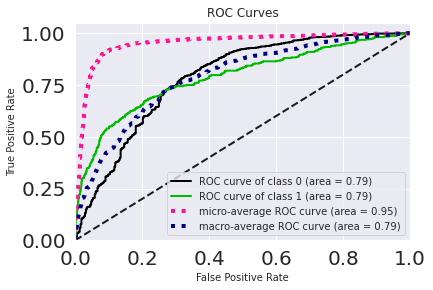

SMOTE



/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision score 0.48484848484848486
Recall score 0.3829787234042553
F1-score score 0.42793462109955427
Accuracy score 0.8947512301804265



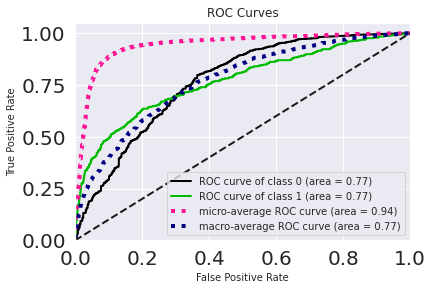

Random over



/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision score 0.31420765027322406
Recall score 0.6117021276595744
F1-score score 0.4151624548736462
Accuracy score 0.8228540185893931



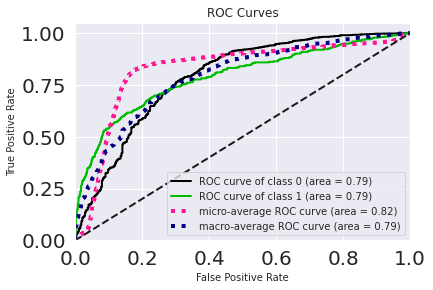

Random under

Precision score 0.32786885245901637
Recall score 0.5851063829787234
F1-score score 0.4202483285577841
Accuracy score 0.8340623291416074



/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


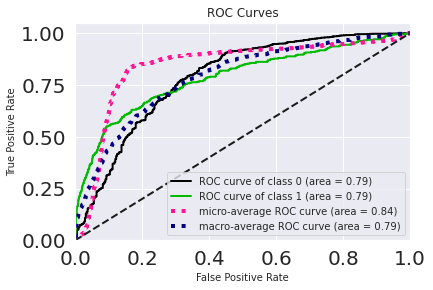

Random under + SMOTE



/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision score 0.3923766816143498
Recall score 0.4654255319148936
F1-score score 0.4257907542579076
Accuracy score 0.8709677419354839



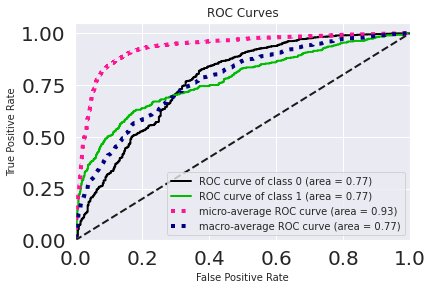

In [56]:
builds(algo='log')

## 5.2 Different models tested

In [57]:
def print_stats(y_test, y_pred):
    print('Precision score %s' % precision_score(y_test, y_pred))
    print('Recall score %s' % recall_score(y_test, y_pred))
    print('F1-score score %s' % f1_score(y_test, y_pred))
    print('Accuracy score %s' % accuracy_score(y_test, y_pred))

def grid_search(algo = 'd_tree',):
    print('--------ALGORITHM-------\n', algo,'\n')
    times = []
    f1s = []
    accuracies = []
    configs = []

    if algo == 'd_tree':
        model = DecisionTreeClassifier()
        param_grid = {'criterion':['gini', 'entropy'],
                     'splitter':['best', 'random'],
                     'max_depth':[10,100,None]}
        
        for config in ParameterGrid(param_grid):
            print("Config", config)
            t = time.time()
            clf = DecisionTreeClassifier(**config, random_state=r_state)
            clf.fit(X_res_under, y_res_under)
            y_pred = clf.predict(X_test)
            
            times.append(time.time()-t)
            f1s.append(f1_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            configs.append(config)
            
            print(f'Time spent {time.time()-t}\n')
            print_stats(y_test, y_pred)

    elif algo == 'log':
        model = LogisticRegression()
        param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                     'fit_intercept':[True,False]}
        
        for config in ParameterGrid(param_grid):
            print("Config", config)
            t = time.time()
            clf = LogisticRegression(**config, random_state=r_state)
            clf.fit(X_res_under, y_res_under)
            y_pred = clf.predict(X_test)
            
            times.append(time.time()-t)
            f1s.append(f1_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            configs.append(config)
            
            print(f'Time spent {time.time()-t}\n')
            print_stats(y_test, y_pred)

    elif algo == 'svm':
        model = SVC()
        param_grid = {'kernel':['linear', 'rbf', 'sigmoid']}

        for config in ParameterGrid(param_grid):
            print("\nConfig", config)
            t = time.time()
            clf = SVC(**config, random_state=r_state)
            clf.fit(X_res_under, y_res_under)
            y_pred = clf.predict(X_test)
            
            times.append(time.time()-t)
            f1s.append(f1_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            configs.append(config)
            
            print(f'Time spent {time.time()-t}\n')
            print_stats(y_test, y_pred)

    elif algo == 'forest':
        model = RandomForestClassifier()
        param_grid = {'criterion':['gini', 'entropy'],
                     'n_estimators':[10, 50, 100],
                     'max_features':['sqrt','log2'],
                     'class_weight':['balanced']}
        
        for config in ParameterGrid(param_grid):
            print("Config", config)
            t = time.time()
            clf = RandomForestClassifier(**config, random_state=r_state)
            clf.fit(X_res_under, y_res_under)
            y_pred = clf.predict(X_test)
            
            times.append(time.time()-t)
            f1s.append(f1_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            configs.append(config)
            
            print(f'Time spent {time.time()-t}\n')
            print_stats(y_test, y_pred)

    elif algo == 'ada':
        model = AdaBoostClassifier()
        param_grid = {'n_estimators':[10,50,100]}
        
        for config in ParameterGrid(param_grid):
            print("Config", config)
            t = time.time()
            clf = AdaBoostClassifier()
            clf.fit(X_res_under, y_res_under)
            y_pred = clf.predict(X_test)
           
            times.append(time.time()-t)
            f1s.append(f1_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            configs.append(config)
            
            print(f'Time spent {time.time()-t}\n')
            print_stats(y_test, y_pred)
            
    
    fig = plt.figure()
    FONTSIZE = 20
    fig, ax1 = plt.subplots(figsize=(20,12))
    plt.rc('font', size=FONTSIZE)
    
    ax1 = sns.barplot(y = accuracies, x = np.arange(0,len(times)), color=sns.color_palette("deep")[0], alpha=0.9, label = 'Accuracy')
    sns.barplot(y = f1s, x = np.arange(0,len(times)), color=sns.color_palette("deep")[1], alpha=0.9, label = 'F1 score')

    ax2 = ax1.twinx() 
    ax2 = sns.scatterplot(y = times, x = np.arange(0,len(times)),label = 'Time', color= sns.color_palette('dark')[3], s=120)
    ax2.grid(False)
    
    # Annotate Text
    for i, acc in enumerate(accuracies):
        ax1.text(i, acc, round(acc, 2), horizontalalignment='center', rotation=90)
    
    for i, f in enumerate(f1s):
        ax1.text(i, f, round(f, 2), horizontalalignment='center', rotation=90)
        
#     ax1.legend()
    ax1.legend(loc='lower right', fontsize=FONTSIZE)
    ax2.legend(fontsize=FONTSIZE)
    
    ax1.set_xlabel('Index of config', fontsize=FONTSIZE)
    ax1.set_ylabel('Score', fontsize=FONTSIZE)
    ax2.set_ylabel('Seconds', fontsize=FONTSIZE)
    
    ax1.tick_params(axis='x', labelsize=16) 
    ax1.tick_params(axis='y', labelsize=16) 
    ax2.tick_params(axis='y', labelsize=16) 

    
    plt.show()

#     fig.savefig('gridCV_'+algo+'.svg', format='svg', transparent=False)
    
    grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, n_jobs= -1)

    grid_search.fit(X_res_under, y_res_under)
    print('\n\nGrid search-CV best params: ', grid_search.best_params_)
    
    clf = grid_search.best_estimator_

    # clf.fit(X_res_under, y_res_under)

    # Test the model
    y_pred = clf.predict(X_test)
    print('Precision score %s' % precision_score(y_test, y_pred))
    print('Recall score %s' % recall_score(y_test, y_pred))
    print('F1-score score %s' % f1_score(y_test, y_pred))
    print('Accuracy score %s\n' % accuracy_score(y_test, y_pred))
    
    return configs

--------ALGORITHM-------
 d_tree 

Config {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
Time spent 0.10375618934631348

Precision score 0.34962406015037595
Recall score 0.4946808510638298
F1-score score 0.4096916299559471
Accuracy score 0.8534718425369054
Config {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Time spent 0.06231522560119629

Precision score 0.3375
Recall score 0.574468085106383
F1-score score 0.4251968503937008
Accuracy score 0.8403499179879715
Config {'criterion': 'gini', 'max_depth': 100, 'splitter': 'best'}
Time spent 0.19568920135498047

Precision score 0.2659758203799655
Recall score 0.4095744680851064
F1-score score 0.3225130890052356
Accuracy score 0.8231273920174959
Config {'criterion': 'gini', 'max_depth': 100, 'splitter': 'random'}
Time spent 0.12838387489318848

Precision score 0.27603305785123966
Recall score 0.4441489361702128
F1-score score 0.34046890927624873
Accuracy score 0.8231273920174959
Config {'criterion': 'gini', 'max_dep

<Figure size 432x288 with 0 Axes>

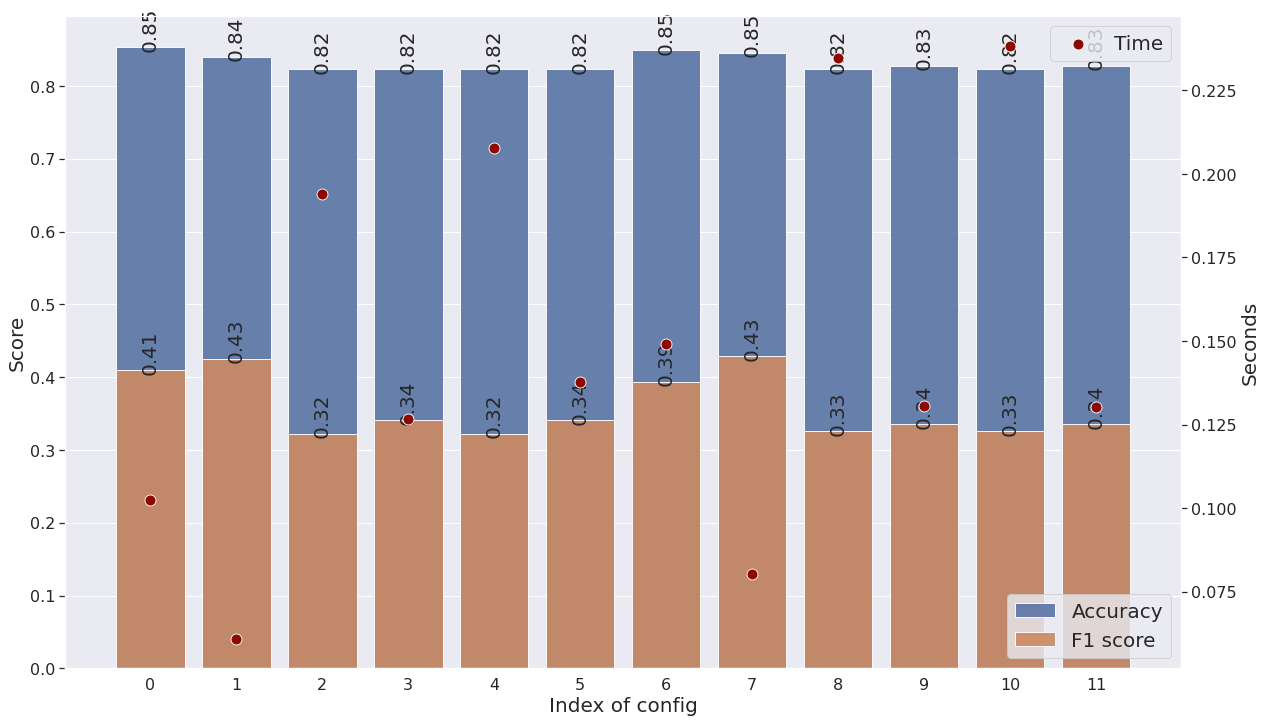



Grid search-CV best params:  {'criterion': 'gini', 'max_depth': 100, 'splitter': 'random'}
Precision score 0.25081967213114753
Recall score 0.40691489361702127
F1-score score 0.3103448275862069
Accuracy score 0.8141060688901038

--------ALGORITHM-------
 forest 

Config {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}


/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Time spent 0.3650364875793457

Precision score 0.36507936507936506
Recall score 0.42819148936170215
F1-score score 0.39412484700122397
Accuracy score 0.8646801530891197
Config {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50}


/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Time spent 1.496239423751831

Precision score 0.3649484536082474
Recall score 0.47074468085106386
F1-score score 0.41114982578397213
Accuracy score 0.8613996719518863
Config {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}


/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Time spent 2.900644302368164

Precision score 0.3771186440677966
Recall score 0.4734042553191489
F1-score score 0.41981132075471694
Accuracy score 0.865500273373428
Config {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
Time spent 0.30626797676086426

Precision score 0.36507936507936506
Recall score 0.42819148936170215
F1-score score 0.39412484700122397
Accuracy score 0.8646801530891197
Config {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
Time spent 1.497030258178711

Precision score 0.3649484536082474
Recall score 0.47074468085106386
F1-score score 0.41114982578397213
Accuracy score 0.8613996719518863
Config {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Time spent 2.823974609375

Precision score 0.3771186440677966
Recall score 0.4734042553191489
F1-score score 0.41981132075471694
Accuracy score 0.865500273373428
Config {'class_weight': 'balance

/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Time spent 0.40966105461120605

Precision score 0.3638392857142857
Recall score 0.43351063829787234
F1-score score 0.39563106796116504
Accuracy score 0.8638600328048114
Config {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50}


/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Time spent 1.868016242980957

Precision score 0.3700623700623701
Recall score 0.4734042553191489
F1-score score 0.41540256709451573
Accuracy score 0.863039912520503
Config {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}


/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Time spent 3.325918674468994

Precision score 0.3707627118644068
Recall score 0.4654255319148936
F1-score score 0.41273584905660377
Accuracy score 0.8638600328048114
Config {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
Time spent 0.34136176109313965

Precision score 0.3638392857142857
Recall score 0.43351063829787234
F1-score score 0.39563106796116504
Accuracy score 0.8638600328048114
Config {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}
Time spent 1.6555492877960205

Precision score 0.3700623700623701
Recall score 0.4734042553191489
F1-score score 0.41540256709451573
Accuracy score 0.863039912520503
Config {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
Time spent 3.3222975730895996

Precision score 0.3707627118644068
Recall score 0.4654255319148936
F1-score score 0.41273584905660377
Accuracy score 0.8638600328048114
Config {'class_weig

<Figure size 432x288 with 0 Axes>

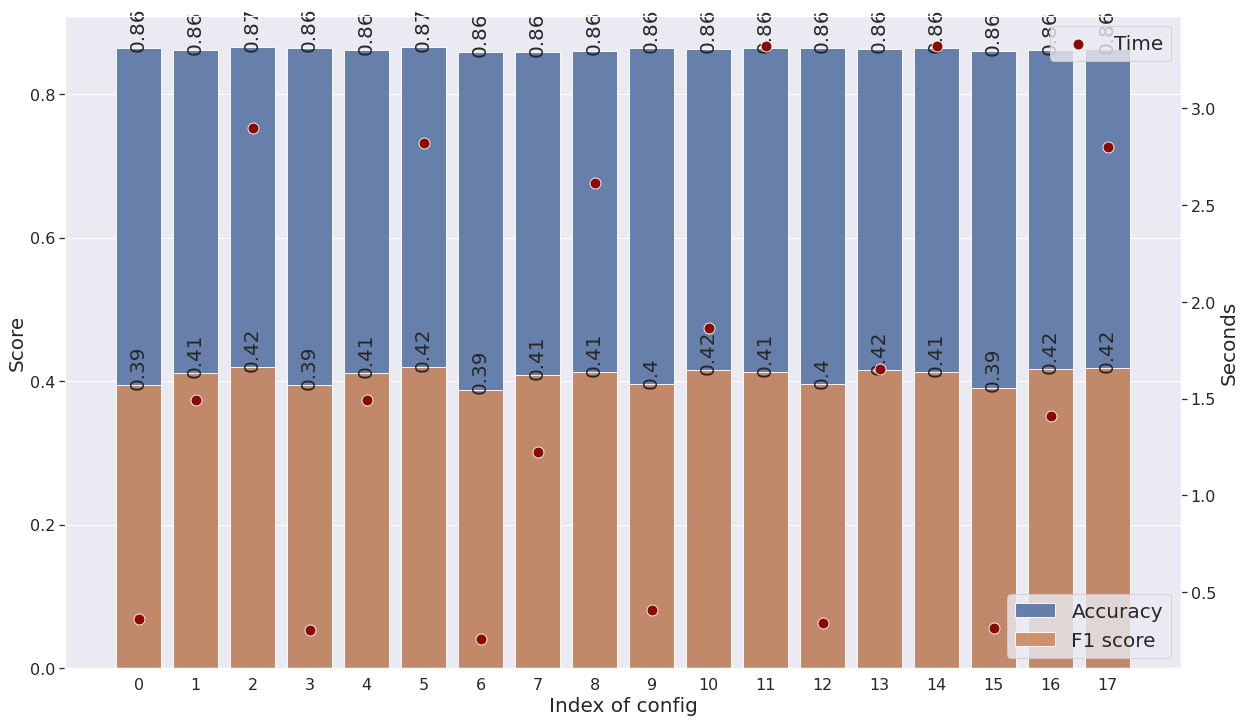

/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 



Grid search-CV best params:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
Precision score 0.35802469135802467
Recall score 0.4627659574468085
F1-score score 0.4037122969837587
Accuracy score 0.8594860579551667

--------ALGORITHM-------
 svm 


Config {'kernel': 'linear'}
Time spent 115.01669764518738

Precision score 0.45454545454545453
Recall score 0.4521276595744681
F1-score score 0.4533333333333333
Accuracy score 0.8879168944778567

Config {'kernel': 'rbf'}
Time spent 58.30093955993652

Precision score 0.4091954022988506
Recall score 0.4734042553191489
F1-score score 0.43896424167694204
Accuracy score 0.8756150902132313

Config {'kernel': 'sigmoid'}
Time spent 173.95240950584412

Precision score 0.1361842105263158
Recall score 0.550531914893617
F1-score score 0.21835443037974683
Accuracy score 0.5948605795516676


<Figure size 432x288 with 0 Axes>

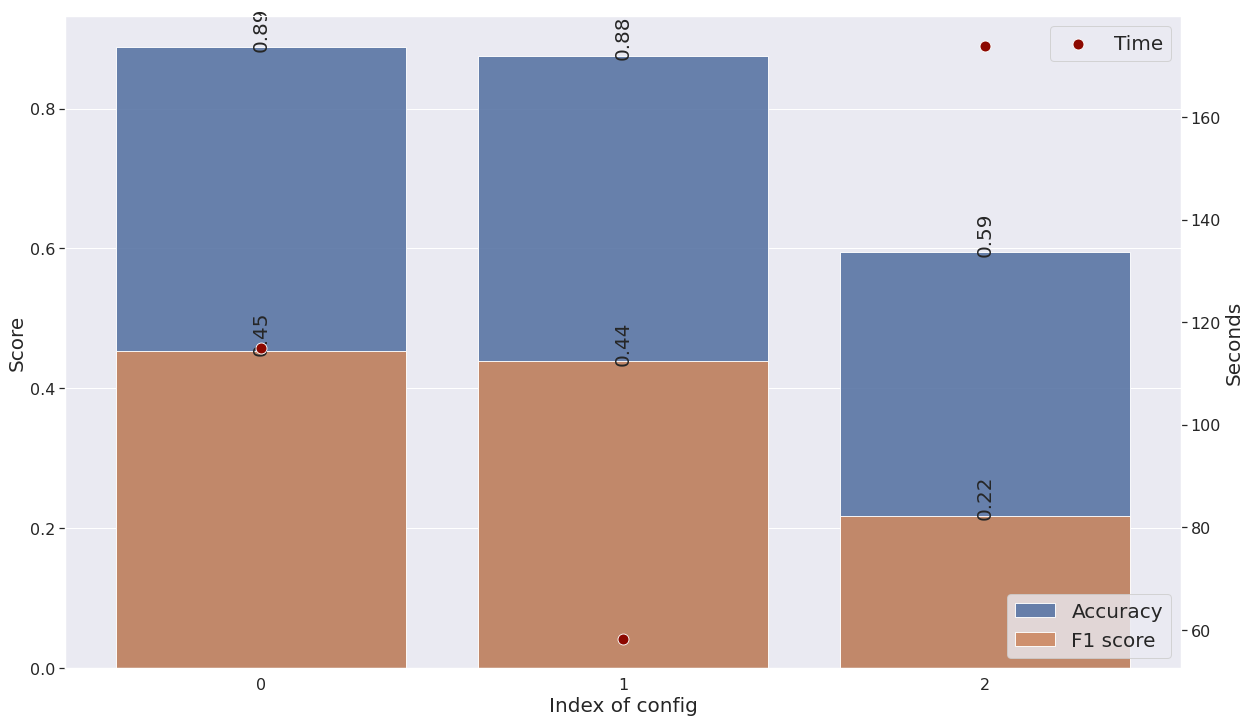



Grid search-CV best params:  {'kernel': 'rbf'}
Precision score 0.4091954022988506
Recall score 0.4734042553191489
F1-score score 0.43896424167694204
Accuracy score 0.8756150902132313

--------ALGORITHM-------
 log 

Config {'fit_intercept': True, 'solver': 'newton-cg'}
Time spent 3.3259072303771973

Precision score 0.3968609865470852
Recall score 0.47074468085106386
F1-score score 0.43065693430656937
Accuracy score 0.8720612356478951
Config {'fit_intercept': True, 'solver': 'lbfgs'}


/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time spent 1.014399766921997

Precision score 0.3923766816143498
Recall score 0.4654255319148936
F1-score score 0.4257907542579076
Accuracy score 0.8709677419354839
Config {'fit_intercept': True, 'solver': 'liblinear'}
Time spent 0.5562307834625244

Precision score 0.38913043478260867
Recall score 0.47606382978723405
F1-score score 0.42822966507177035
Accuracy score 0.8693275013668671
Config {'fit_intercept': True, 'solver': 'sag'}
Time spent 1.4476170539855957

Precision score 0.3968609865470852
Recall score 0.47074468085106386
F1-score score 0.43065693430656937
Accuracy score 0.8720612356478951
Config {'fit_intercept': True, 'solver': 'saga'}


/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Time spent 2.7193093299865723

Precision score 0.3968609865470852
Recall score 0.47074468085106386
F1-score score 0.43065693430656937
Accuracy score 0.8720612356478951
Config {'fit_intercept': False, 'solver': 'newton-cg'}
Time spent 1.9553229808807373

Precision score 0.34317343173431736
Recall score 0.4946808510638298
F1-score score 0.40522875816993464
Accuracy score 0.8507381082558775
Config {'fit_intercept': False, 'solver': 'lbfgs'}


/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time spent 1.1906812191009521

Precision score 0.34317343173431736
Recall score 0.4946808510638298
F1-score score 0.40522875816993464
Accuracy score 0.8507381082558775
Config {'fit_intercept': False, 'solver': 'liblinear'}
Time spent 0.4552459716796875

Precision score 0.34317343173431736
Recall score 0.4946808510638298
F1-score score 0.40522875816993464
Accuracy score 0.8507381082558775
Config {'fit_intercept': False, 'solver': 'sag'}
Time spent 0.5811166763305664

Precision score 0.34317343173431736
Recall score 0.4946808510638298
F1-score score 0.40522875816993464
Accuracy score 0.8507381082558775
Config {'fit_intercept': False, 'solver': 'saga'}
Time spent 1.2940516471862793

Precision score 0.34317343173431736
Recall score 0.4946808510638298
F1-score score 0.40522875816993464
Accuracy score 0.8507381082558775


<Figure size 432x288 with 0 Axes>

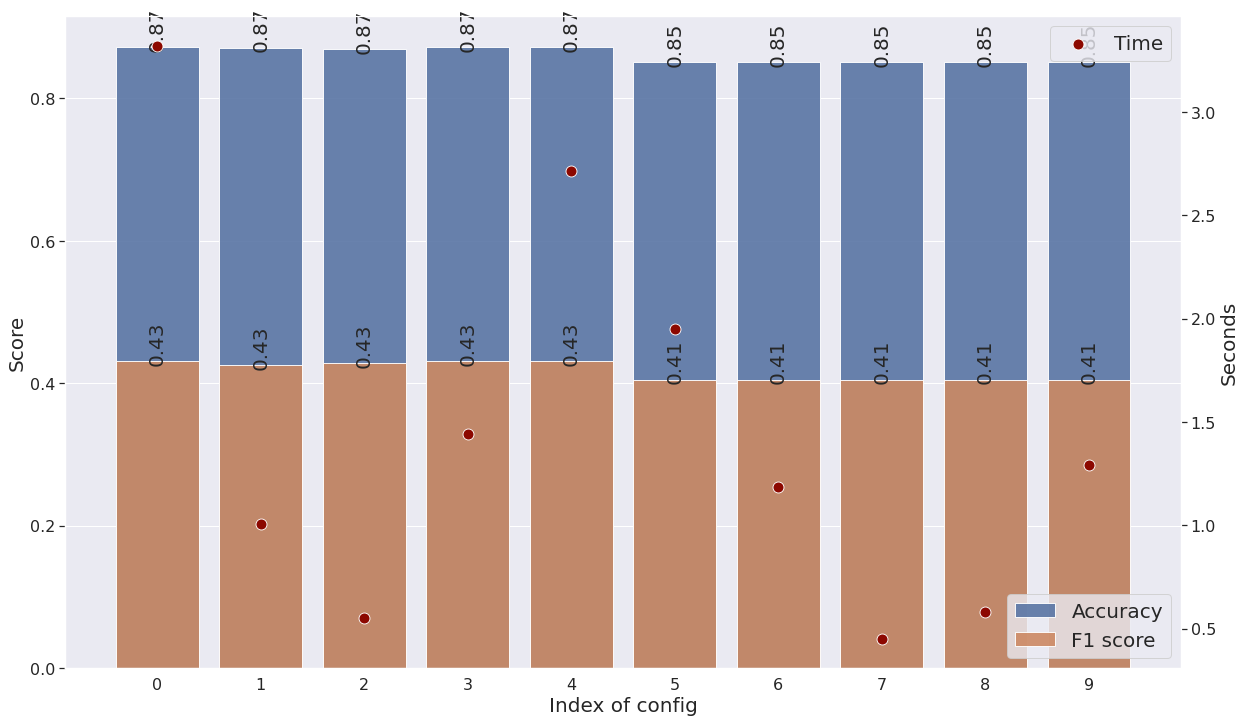

/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi



Grid search-CV best params:  {'fit_intercept': True, 'solver': 'liblinear'}
Precision score 0.38913043478260867
Recall score 0.47606382978723405
F1-score score 0.42822966507177035
Accuracy score 0.8693275013668671

--------ALGORITHM-------
 ada 

Config {'n_estimators': 10}
Time spent 1.3128488063812256

Precision score 0.3223787167449139
Recall score 0.5478723404255319
F1-score score 0.40591133004926105
Accuracy score 0.8351558228540186
Config {'n_estimators': 50}
Time spent 1.2085442543029785

Precision score 0.3223787167449139
Recall score 0.5478723404255319
F1-score score 0.40591133004926105
Accuracy score 0.8351558228540186
Config {'n_estimators': 100}
Time spent 1.2018070220947266

Precision score 0.3223787167449139
Recall score 0.5478723404255319
F1-score score 0.40591133004926105
Accuracy score 0.8351558228540186


<Figure size 432x288 with 0 Axes>

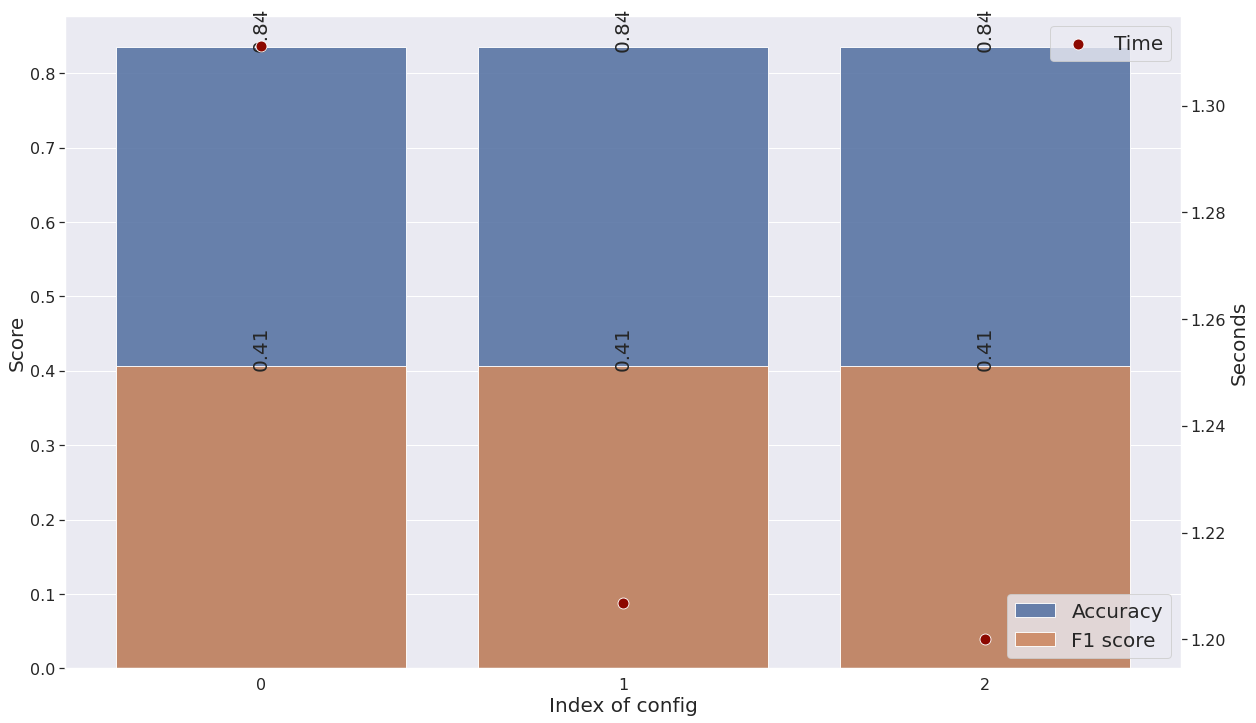



Grid search-CV best params:  {'n_estimators': 100}
Precision score 0.3442340791738382
Recall score 0.5319148936170213
F1-score score 0.41797283176593525
Accuracy score 0.8477310005467469



In [58]:
d_trees = grid_search(algo='d_tree')
forests = grid_search(algo='forest')
svms = grid_search(algo='svm')
logs = grid_search(algo='log')
adas = grid_search(algo='ada')

In [59]:
d_trees[6]

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

In [60]:
forests[7]

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 50}

In [61]:
logs[1]

{'fit_intercept': True, 'solver': 'lbfgs'}

In [62]:
svms[1]

{'kernel': 'rbf'}

In [63]:
adas[2]

{'n_estimators': 100}

<Figure size 432x288 with 0 Axes>

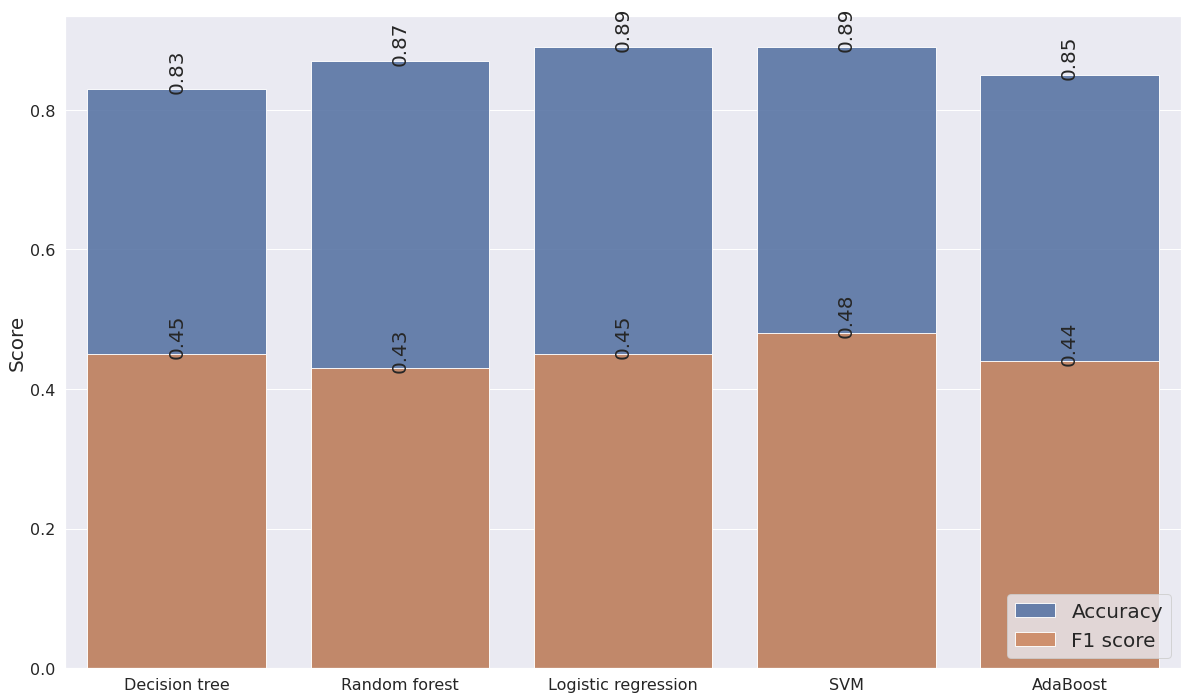

In [64]:
algs = ['Decision tree', 'Random forest', 'Logistic regression', 'SVM', 'AdaBoost']
accs = [0.83, 0.87, 0.89, 0.89, 0.85]
f1s = [0.45, 0.43, 0.45, 0.48, 0.44]

fig = plt.figure()
FONTSIZE = 20
fig, ax = plt.subplots(figsize=(20,12))
plt.rc('font', size=FONTSIZE)

ax = sns.barplot(y = accs, x = algs, color=sns.color_palette("deep")[0], alpha=0.9, label = 'Accuracy')
sns.barplot(y = f1s, x = algs, color=sns.color_palette("deep")[1], alpha=0.9, label = 'F1 score')
# Annotate Text
for i, acc in enumerate(accs):
    ax.text(i, acc, round(acc, 2), horizontalalignment='center', rotation=90)

for i, f in enumerate(f1s):
    ax.text(i, f, round(f, 2), horizontalalignment='center', rotation=90)

#     ax1.legend()
ax.legend(loc='lower right', fontsize=FONTSIZE)

# ax.set_xlabel('', fontsize=FONTSIZE)
ax.set_ylabel('Score', fontsize=FONTSIZE)

ax.tick_params(axis='x', labelsize=16) 
ax.tick_params(axis='y', labelsize=16) 


plt.show()
fig.savefig('concl.svg', format='svg', transparent=False)


In [68]:
model = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy'],
             'splitter':['best', 'random'],
             'max_depth':[10,100,None]}

for config in ParameterGrid(param_grid):
    print(config)
    t = time.time()
    clf = DecisionTreeClassifier(**config, random_state=r_state)
    clf.fit(X_res_under, y_res_under)
    y_pred = clf.predict(X_test)
    print('Precision score %s' % precision_score(y_test, y_pred))
    print('Recall score %s' % recall_score(y_test, y_pred))
    print('F1-score score %s' % f1_score(y_test, y_pred))
    print('Accuracy score %s' % accuracy_score(y_test, y_pred))
    print(f'Time spent {time.time()-t}\n')

grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, n_jobs= -1)

grid_search.fit(X_res_under, y_res_under)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
Precision score 0.34962406015037595
Recall score 0.4946808510638298
F1-score score 0.4096916299559471
Accuracy score 0.8534718425369054
Time spent 0.11345148086547852

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Precision score 0.3375
Recall score 0.574468085106383
F1-score score 0.4251968503937008
Accuracy score 0.8403499179879715
Time spent 0.06111454963684082

{'criterion': 'gini', 'max_depth': 100, 'splitter': 'best'}
Precision score 0.2659758203799655
Recall score 0.4095744680851064
F1-score score 0.3225130890052356
Accuracy score 0.8231273920174959
Time spent 0.1605844497680664

{'criterion': 'gini', 'max_depth': 100, 'splitter': 'random'}
Precision score 0.27603305785123966
Recall score 0.4441489361702128
F1-score score 0.34046890927624873
Accuracy score 0.8231273920174959
Time spent 0.096527099609375

{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
Precision score 0.2659758203799655
Recall 

{'criterion': 'gini', 'max_depth': 100, 'splitter': 'random'}

In [69]:
clf = grid_search.best_estimator_

# clf.fit(X_res_under, y_res_under)

# Test the model
y_pred = clf.predict(X_test)
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))
print('F1-score score %s' % f1_score(y_test, y_pred))
print('Accuracy score %s\n' % accuracy_score(y_test, y_pred))

Precision score 0.24013157894736842
Recall score 0.3882978723404255
F1-score score 0.29674796747967475
Accuracy score 0.8108255877528704



### Logistic regression

In [70]:
model = LogisticRegression()
param_grid = {'penalty':['l1', 'l2'],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'fit_intercept':[True,False]             
             'max_iter': 500} 
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, n_jobs= -1)

grid_search.fit(X_res_under, y_res_under)
grid_search.best_params_

/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matteo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

{'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}

In [71]:
clf = grid_search.best_estimator_

# Test the model
y_pred = clf.predict(X_test)
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))
print('F1-score score %s' % f1_score(y_test, y_pred))
print('Accuracy score %s\n' % accuracy_score(y_test, y_pred))

Precision score 0.38913043478260867
Recall score 0.47606382978723405
F1-score score 0.42822966507177035
Accuracy score 0.8693275013668671



### Random forest

In [72]:
model = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=100)
model.fit(X_res_under, y_res_under)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10)

[0.35874825 0.50233378 0.37742319 ... 0.19025262 0.26347077 0.26623073]
Precision score 0.4703703703703704
Recall score 0.3377659574468085
F1-score score 0.3931888544891641
Accuracy score 0.8928376161837069



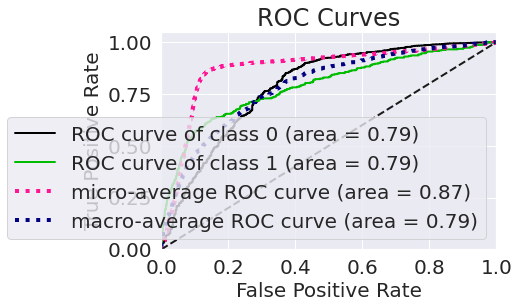

In [77]:
# Test the model
# y_pred = model.predict(X_test)
print(model.predict_proba(X_test)[:,1])
y_pred = np.where(model.predict_proba(X_test)[:,1] > 0.76, 1, 0)

plot_roc(y_test,model.predict_proba(X_test))

print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))
print('F1-score score %s' % f1_score(y_test, y_pred))
print('Accuracy score %s\n' % accuracy_score(y_test, y_pred))

In [78]:
confusion_matrix(y_test, y_pred)

array([[3139,  143],
       [ 249,  127]])

In [80]:
model = RandomForestClassifier()
param_grid = {'criterion':['gini', 'entropy'],
             'n_estimators':[10, 50, 100],
             'max_depth':[10,100,None],
             'max_features':['sqrt','log2'],
             'class_weight':['balanced']}
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, n_jobs= -1)

grid_search.fit(X_res_under, y_res_under)
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [81]:
clf = grid_search.best_estimator_

clf.fit(X_res_under, y_res_under)

# Test the model
y_pred = clf.predict(X_test)
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))
print('F1-score score %s' % f1_score(y_test, y_pred))
print('Accuracy score %s\n' % accuracy_score(y_test, y_pred))

Precision score 0.36983471074380164
Recall score 0.47606382978723405
F1-score score 0.41627906976744183
Accuracy score 0.8627665390924002



### SVM

In [82]:
model = SVC()
param_grid = {'kernel':['linear', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, n_jobs= -1)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'kernel': 'rbf'}

In [83]:
clf = grid_search.best_estimator_

clf.fit(X_res_under, y_res_under)

# Test the model
y_pred = clf.predict(X_test)
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))
print('F1-score score %s' % f1_score(y_test, y_pred))
print('Accuracy score %s\n' % accuracy_score(y_test, y_pred))

Precision score 0.4091954022988506
Recall score 0.4734042553191489
F1-score score 0.43896424167694204
Accuracy score 0.8756150902132313



In [84]:
confusion_matrix(y_test, y_pred)

array([[3025,  257],
       [ 198,  178]])

### Ada-boost

In [91]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
model = AdaBoostClassifier()
param_grid = {'n_estimators':[10,50,100]}
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, n_jobs= -1)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_estimators': 50}

In [92]:
clf = grid_search.best_estimator_

clf.fit(X_res_under, y_res_under)

# Test the model
y_pred = clf.predict(X_test)
print('Precision score %s' % precision_score(y_test, y_pred))
print('Recall score %s' % recall_score(y_test, y_pred))
print('F1-score score %s' % f1_score(y_test, y_pred))
print('Accuracy score %s\n' % accuracy_score(y_test, y_pred))

Precision score 0.3223787167449139
Recall score 0.5478723404255319
F1-score score 0.40591133004926105
Accuracy score 0.8351558228540186

